In [1]:
#import packages
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#load the data
data_frame = pd.read_csv("T40.1_TLW.txt",delimiter="\t")
#drop redundant column
data_frame = data_frame.drop(axis = "columns", columns = "Year")
#adjust the column names for readability
data_frame = data_frame.rename(columns={'Single Race 6': 'Race', 'Year Code' : 'Year' }) #correct names so code works

In [3]:
#replace "unreliable" with NaN
data_frame=data_frame.replace("Unreliable",np.nan)

In [4]:
#drop 2023 because of unreliable data
data_frame = data_frame[data_frame['Year'] != 2023]

In [5]:
#preview data
data_frame[(data_frame["Gender"] == "Male")& (data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total")]

,Notes,Gender,Gender Code,Race,Single Race 6 Code,Year,Deaths,Population,Crude Rate
29,NaN,Male,M,American Indian or Alaska Native,1002-5,2018.0,89.0,2089298.0,4.3
30,NaN,Male,M,American Indian or Alaska Native,1002-5,2019.0,82.0,2108806.0,3.9
31,NaN,Male,M,American Indian or Alaska Native,1002-5,2020.0,95.0,2160174.0,4.4
32,NaN,Male,M,American Indian or Alaska Native,1002-5,2021.0,68.0,2205122.0,3.1
33,NaN,Male,M,American Indian or Alaska Native,1002-5,2022.0,45.0,2217408.0,2.0


In [6]:
#define variables for each gender and race
CFb = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)             
CFw = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
#Can't include asian females bc too many 'unreliable'
#CFa = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Asian")& 
#           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMa = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Asian")& 
           (data_frame["Notes"] != "Total") & (data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)

CFn = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMn = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)

In [7]:
#separate year and crude rate variables for each gender and race
x1b=CFb["Year"]
y1b=CFb["Crude Rate"]

x2b=CMb["Year"]
y2b=CMb["Crude Rate"]

x1w=CFw["Year"]
y1w=CFw["Crude Rate"]

x2w=CMw["Year"]
y2w=CMw["Crude Rate"]

#x1a=CFa["Year"]
#y1a=CFa["Crude Rate"]

x2a=CMa["Year"]
y2a=CMa["Crude Rate"]

x1n=CFn["Year"]
y1n=CFn["Crude Rate"]

x2n=CMn["Year"]
y2n=CMn["Crude Rate"]

In [8]:
#fit data for each race and gender
coeffFb = np.polyfit(x1b, y1b, 2)
coeffMb = np.polyfit(x2b, y2b, 2)

coeffFw = np.polyfit(x1w, y1w, 2)
coeffMw = np.polyfit(x2w, y2w, 2)

#coeffFa = np.polyfit(x1a, y1a, 2)
coeffMa = np.polyfit(x2a, y2a, 2)

coeffFn = np.polyfit(x1n, y1n, 2)
coeffMn = np.polyfit(x2n, y2n, 2)

#designate years
gdf = pd.DataFrame({"value": [2018, 2018.5, 2019, 2019.5, 2020, 2020.5, 2021, 2021.5, 2022]})

([<matplotlib.axis.XTick at 0x282401b10>,
 [Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

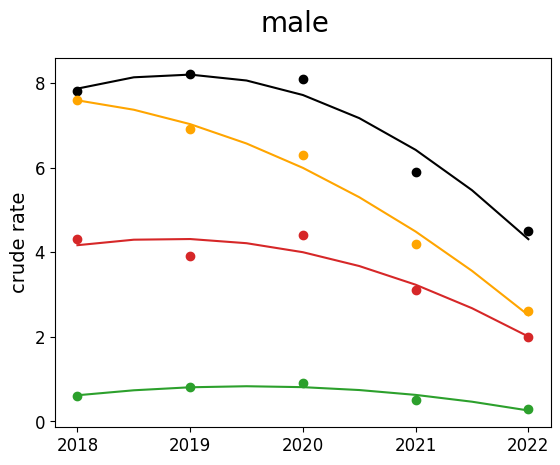

In [9]:
#plot the male data for each race
plt.plot(gdf, np.polyval(coeffMb,gdf), color='black')
plt.scatter(x2b,y2b, color='black')

plt.plot(gdf, np.polyval(coeffMw,gdf), color='orange')
plt.scatter(x2w,y2w, color='orange')

plt.plot(gdf, np.polyval(coeffMa,gdf), color='tab:green')
plt.scatter(x2a,y2a, color='tab:green')

plt.plot(gdf, np.polyval(coeffMn,gdf), color='tab:red')
plt.scatter(x2n,y2n, color='tab:red')

plt.suptitle('male', fontsize=20)
plt.ylabel("crude rate", fontsize =14)
plt.yticks(np.arange(0, 9.1, 2.0))

plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.xticks(np.arange(2018, 2022.5, 1.0))
#plt.savefig('T40.1_Males_R.png')

([<matplotlib.axis.XTick at 0x2824bdd90>,
 [Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

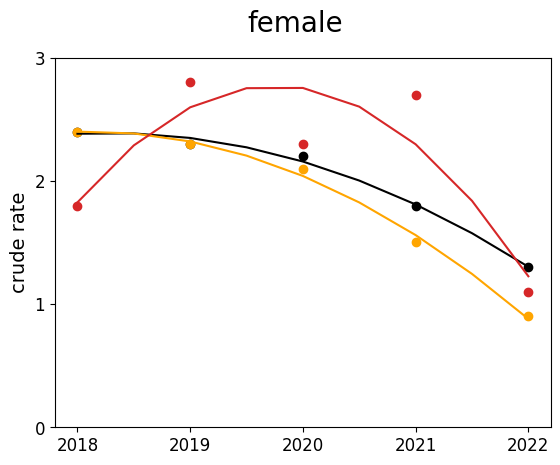

In [10]:
#plot the female data for each race
plt.plot(gdf, np.polyval(coeffFb,gdf), color='black')
plt.scatter(x1b,y1b, color='black')

plt.plot(gdf, np.polyval(coeffFw,gdf), color='orange')
plt.scatter(x1w,y1w, color='orange')

#plt.plot(gdf, np.polyval(coeffMa,gdf), color='tab:green')
#plt.scatter(x2a,y2a, color='tab:green')

plt.plot(gdf, np.polyval(coeffFn,gdf), color='tab:red')
plt.scatter(x1n,y1n, color='tab:red')

plt.suptitle('female', fontsize=20)
plt.ylabel("crude rate", fontsize =14)
plt.yticks(np.arange(0, 3.1, 1.0))

plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.xticks(np.arange(2018, 2022.5, 1.0))
#plt.savefig('T40.1_Females_R.png')